In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read and explore the Dataset

### Reading Dataset

In [42]:
df = pd.read_csv("data.csv")
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### EDA

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [44]:
df.isna().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [45]:
# Output class has two unique values
df['Class'].value_counts()

Class
2    458
4    241
Name: count, dtype: int64

In [46]:
df['Clump Thickness'].unique()

array([ 5,  3,  6,  4,  8,  1,  2,  7, 10,  9])

In [47]:
for col in df.columns:
    if(col != "Sample code number"):
        print("Unique value in '{}' column is:".format(col), end=" ")
        print(df[col].unique())
        print("\n")


Unique value in 'Clump Thickness' column is: [ 5  3  6  4  8  1  2  7 10  9]


Unique value in 'Uniformity of Cell Size' column is: [ 1  4  8 10  2  3  7  5  6  9]


Unique value in 'Uniformity of Cell Shape' column is: [ 1  4  8 10  2  3  5  6  7  9]


Unique value in 'Marginal Adhesion' column is: [ 1  5  3  8 10  4  6  2  9  7]


Unique value in 'Single Epithelial Cell Size' column is: [ 2  7  3  1  6  4  5  8 10  9]


Unique value in 'Bare Nuclei' column is: ['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


Unique value in 'Bland Chromatin' column is: [ 3  9  1  2  4  5  7  8  6 10]


Unique value in 'Normal Nucleoli' column is: [ 1  2  7  4  5  3 10  6  9  8]


Unique value in 'Mitoses' column is: [ 1  5  4  2  3  7 10  8  6]


Unique value in 'Class' column is: [2 4]




In [48]:
# Some values in the column has '?' value
df['Bare Nuclei'].value_counts()

Bare Nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64

In [49]:
# 8 duplicate rows are present
df.duplicated().sum()

np.int64(8)

## Perform Data Pre-processing

### Replacing ? in Bare Nuclei column to a valid value

In [50]:

df['Bare Nuclei'] = df['Bare Nuclei'].replace('?', np.nan)

In [51]:
df.isna().sum()

Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [52]:
df['Bare Nuclei'] = df['Bare Nuclei'].astype(float)

In [53]:
df.dtypes

Sample code number               int64
Clump Thickness                  int64
Uniformity of Cell Size          int64
Uniformity of Cell Shape         int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                    float64
Bland Chromatin                  int64
Normal Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

In [54]:
df['Bare Nuclei'] = df['Bare Nuclei'].fillna(df['Bare Nuclei'].mean())

In [55]:
df.isna().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

### Dropping duplicates

In [56]:
df = df.drop_duplicates()

In [57]:
df.duplicated().sum()

np.int64(0)

In [58]:
df['Class'].value_counts()

Class
2    453
4    238
Name: count, dtype: int64

### Feature Engineering

- First column is the unique id of the sample.
- This id is assigned when sample is collected for the dataset.
- This id has no role in predicting output, hence we can remove this column.
- Removing sample code number helps to improve model performance.

In [59]:
df = df.drop(columns=['Sample code number'], axis=1)

### Final Statistics

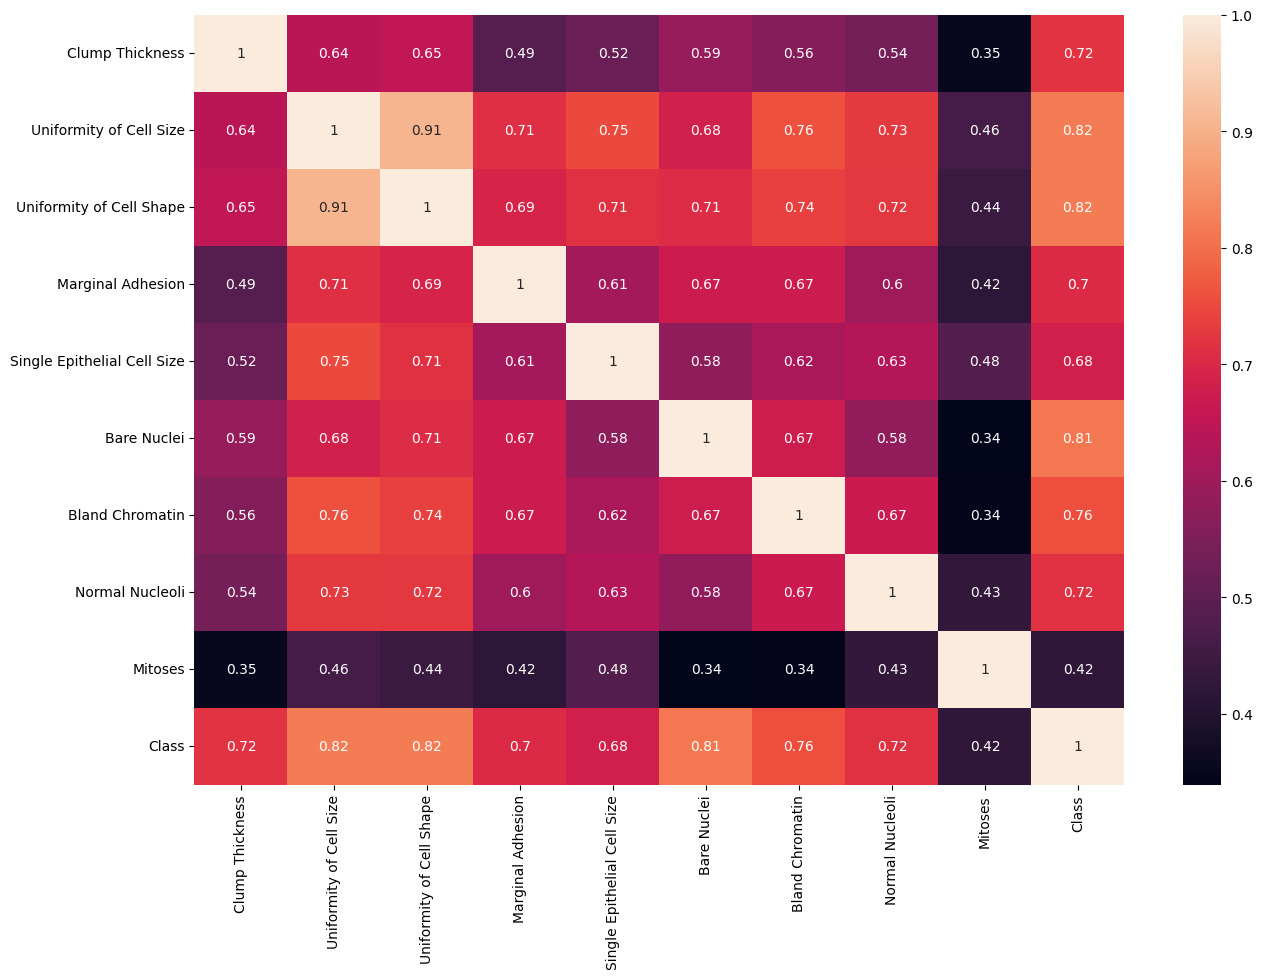

In [60]:
# Correlation heatmap
sns.heatmap(df.corr(), annot=True)
fig = plt.gcf()
fig.set_size_inches(15,10)

In [61]:
# Null Values
df.isna().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [62]:
X = df.drop(columns=['Class'], axis=1)
y = df['Class']

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Normalising dataset 

In [64]:
print(X_train.shape)
print(y_train.shape)

(552, 9)
(552,)


In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Supervised Model Training

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [72]:
randomForestClassifier = RandomForestClassifier()

In [74]:
randomForestClassifier.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [75]:
randomForestClassifier.score(X_test, y_test)

0.9640287769784173

In [76]:
y_pred = randomForestClassifier.predict(X_test)

### Model Performance for Supervised Machine Learning

In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [78]:
accuracy_score(y_test, y_pred)

0.9640287769784173

In [79]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[96,  2],
       [ 3, 38]])

In [80]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           2       0.97      0.98      0.97        98\n           4       0.95      0.93      0.94        41\n\n    accuracy                           0.96       139\n   macro avg       0.96      0.95      0.96       139\nweighted avg       0.96      0.96      0.96       139\n'

## Semi-Supervised Machine Learning

In [81]:
initial_train_unlabeled_idx = np.random.choice(X_train.shape[0], 400, replace=False)
initial_train_unlabeled_idx

array([221, 147, 455, 226, 322, 521,  88, 150, 135, 106, 476,  86, 234,
       247,  54, 450,  87, 153,  75, 386, 254, 363,  33, 325, 267, 518,
       367, 211, 474, 187, 375,  47, 452, 193, 228, 516, 241, 162, 429,
       489, 210, 442,  40, 230, 302, 297, 316, 160, 243, 456, 258,  83,
       502, 537, 208, 505, 201, 381, 189, 404, 393, 331, 198, 538, 250,
       352, 327, 464,  79, 409, 420, 253, 451,  45, 475, 158, 227, 217,
       401, 111, 365, 276, 527, 453, 190, 260, 148, 490, 244, 303, 509,
       174, 200, 430, 280, 469, 299, 256, 435, 550, 348,  57, 373, 549,
       547, 519, 436, 213, 481, 389, 265, 128, 355, 422, 488, 483, 396,
       513, 238, 491, 540, 151, 427, 156, 315,  22, 185, 335, 181, 487,
       377,  21, 532, 406, 269,   8,  27,  43, 218, 214, 195,  28, 298,
        70, 374, 283, 530,  72, 418, 223, 410,  61, 172, 495, 296, 376,
        29, 203, 336, 423, 121,  59, 408, 170, 343,  13, 448, 525,  10,
       183, 480, 225, 304, 466, 462, 485,  69,  24, 268,  81, 21

In [ ]:
y_train_arr_copy = y_train.values

array([2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2,
       4, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 2,
       2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2,
       2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2,
       2, 4, 2, 4, 4, 2, 4, 4, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 4,
       2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 4, 2, 4, 2, 4,
       2, 2, 4, 2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2,
       2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2,
       2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4,
       2, 2, 4, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 2, 4,

In [89]:
y_train_arr_copy[initial_train_unlabeled_idx] = -1

In [90]:
from sklearn.semi_supervised import SelfTrainingClassifier
self_training_model = SelfTrainingClassifier(base_estimator=randomForestClassifier)
self_training_model.fit(X_train, y_train_arr_copy)

/Users/uday/Desktop/IIIT Dharwad/sem1/mlp-assignment/venv/lib/python3.12/site-packages/sklearn/semi_supervised/_self_training.py:210: FutureWarning: `base_estimator` has been deprecated in 1.6 and will be removed in 1.8. Please use `estimator` instead.
  warn(


,estimator,None
,base_estimator,RandomForestClassifier()
,threshold,0.75
,criterion,'threshold'
,k_best,10
,max_iter,10
,verbose,False
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2


In [91]:
y_unsupervised_pred = self_training_model.predict(X_test)

In [92]:
self_training_model.score(X_test, y_test)

0.9568345323741008

In [96]:
cm = confusion_matrix(y_test, y_unsupervised_pred)
cm

array([[94,  4],
       [ 2, 39]])

In [97]:
classification_report(y_test, y_unsupervised_pred)

'              precision    recall  f1-score   support\n\n           2       0.98      0.96      0.97        98\n           4       0.91      0.95      0.93        41\n\n    accuracy                           0.96       139\n   macro avg       0.94      0.96      0.95       139\nweighted avg       0.96      0.96      0.96       139\n'

## Conclusion

Accuracy score of a supervised machine learning model: **96.40** \
Accuracy score of an semi-supervised machine learning model: **95.68**

- Clearly both the accuracies are similar.
- In case of where labeled data are less in number we can consider using semi-supervised machine learning.
- This helps in cost reduction in labeling the data and saves time.

